*Donald Knuth: "Premature optimization is the root of all evil"*

**Оригинал**: https://ipython-books.github.io/chapter-5-high-performance-computing/

- Компиляция [Just-In-Time (JIT)](https://ru.wikipedia.org/wiki/JIT-%D0%BA%D0%BE%D0%BC%D0%BF%D0%B8%D0%BB%D1%8F%D1%86%D0%B8%D1%8F) кода Python.
- Использование языка более низкого уровня, такого как C, из Python.
- Распределение задач между несколькими вычислительными блоками с использованием параллельных вычислений.

### Компиляция Just-In-Time (JIT) кода Python

Благодаря JIT код Python динамически компилируется в язык более низкого уровня. Компиляция происходит во время выполнения, а не перед выполнением. Переведенный код работает быстрее, поскольку он компилируется, а не интерпретируется. JIT-компиляция является популярной техникой, поскольку она может привести к быстрым и высокоуровневым языкам, в то время как эти две характеристики раньше были взаимоисключающими.

Методы JIT-компиляции реализованы в таком пакете, как **Numba**.

PyPy ([официальный сайт](http://pypy.org) и [блог](https://morepypy.blogspot.com/)) - альтернативная реализация Python (эталонная реализация CPython) включает JIT-компилятор. 

PyPy состоит из стандартного интерпретатора и транслятора.

Интерпретатор полностью реализует язык Python. Сам интерпретатор написан на ограниченном подмножестве этого же языка, называемом RPython (Restricted Python). В отличие от стандартного Python, [RPython](https://rpython.readthedocs.io/en/latest/architecture.html) является статически типизированным для более эффективной компиляции.

Транслятор является набором инструментов, который анализирует код RPython и переводит его в языки более низкого уровня, такие как C, байт-код Java или CIL. Он также поддерживает подключаемые сборщики мусора и позволяет опционально включать [Stackless](https://ru.wikipedia.org/wiki/Stackless_Python). Также он включает JIT-компилятор для трансляции кода в машинные инструкции во время исполнения программы.

### Использование языка более низкого уровня

Использование языка более низкого уровня, такого как C, является еще одним интересным методом. Популярные библиотеки включают в себя ctypes и Cython. Использование ctypes требует написания кода на C и наличия доступа к компилятору C или использования скомпилированной библиотеки C. В отличие от этого, Cython позволяет писать код в расширенном наборе Python, который переводится в C с различными результатами производительности. 

### CPython and concurrent programming

Основной реализацией языка Python является CPython, написанный на C. CPython интегрирует механизм, называемый Global Interpreter Lock (GIL). Как упоминалось на http://wiki.python.org/moin/GlobalInterpreterLock: 

«GIL облегчает управление памятью, предотвращая одновременное выполнение байт-кодом Python нескольких собственных потоков».

Другими словами, отключая параллельные потоки в одном процессе Python, GIL значительно упрощает систему управления памятью. Поэтому управление памятью не является поточно-ориентированным в CPython.

Важным выводом является то, что CPython делает нетривиальным использование нескольких процессоров в одном процессе Python. Это важная проблема, поскольку современные процессоры содержат все больше и больше ядер.

Какие возможные решения у нас есть, чтобы воспользоваться преимуществами многоядерных процессоров?

- Удаление GIL в CPython. Это решение было опробовано, но никогда не входило в CPython. Это приведет к слишком большой сложности при реализации CPython и ухудшит производительность однопоточных программ.

- Использование нескольких процессов вместо нескольких потоков. Это популярное решение; это можно сделать с помощью собственного многопроцессорного модуля или с помощью IPython. 

- Переписать определенные части кода на Cython и заменить все переменные Python переменными C. Это позволяет временно удалить GIL в цикле, что позволяет использовать многоядерные процессоры. 

- Реализация определенной части кода на языке, который предлагает лучшую поддержку для многоядерных процессоров, и вызов его из вашей программы Python.

- При создании кода используйте функции NumPy, которые получают преимущества от многоядерных процессоров, таких как numpy.dot (). NumPy необходимо скомпилировать с помощью BLAS / LAPACK / ATLAS / MKL.

Обязательную для прочтения ссылку на GIL можно найти по адресу http://www.dabeaz.com/GIL/.


### Инструкции по установке, связанные с компилятором

В Linux необходимо установить gcc. Например, в Ubuntu введите sudo apt-get install build-essential в терминале.

В macOS установите Xcode или Инструменты командной строки Xcode. Или введите gcc в терминале. Если он не установлен, macOS предоставит вам несколько вариантов его установки.

В Windows установите версию Microsoft Visual Studio, Visual C++ или Visual C++ Build Tools, соответствующую вашей версии Python. Если вы используете Python 3.6, соответствующая версия компилятора Microsoft - 2017. Все эти программы бесплатны или имеют бесплатную версию, достаточную для Python.

Вот несколько ссылок:

- Документация по установке Cython по адресу http://cython.readthedocs.io/en/latest/src/quickstart/install.html.
- Компиляторы Windows для Python, по адресу https://wiki.python.org/moin/WindowsCompilers
- Microsoft Visual Studio можно загрузить по адресу https://www.visualstudio.com/downloads/.

### Знание Python для написания более быстрого кода

Первый способ заставить код Python работать быстрее - это знать все возможности языка. Python содержит множество синтаксических функций и модулей в стандартной библиотеке, которые работают намного быстрее, чем все, что вы можете написать вручную. Более того, хотя Python может работать медленно, если вы пишете на Python, как если бы вы писали на C или Java, он часто бывает достаточно быстрым, когда вы пишете Python-код.

В этом разделе мы покажем, как плохо написанный код Python может быть значительно улучшен при использовании всех возможностей языка.

`
Помните про использование NumPy для эффективных операций с массивами
`

1. Давайте определим список нормально распределенных случайных величин, используя вместо NumPy встроенный случайный модуль.

In [20]:
import random
l = [random.normalvariate(0, 1) for i in range(100000)]

2. Давайте напишем функцию, которая вычисляет сумму всех чисел в этом списке. Кто-то неопытный с Python может написать на Python, как если бы это был C, который дал бы следующую функцию:

In [21]:
def sum1():
    # BAD: not Pythonic and slow
    res = 0
    for i in range(len(l)):
        res = res + l[i]
    return res

In [22]:
sum1()

123.15412746384452

In [23]:
%timeit sum1()

4.45 ms ± 98.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


5 миллисекунд для вычисления суммы «только» 100 000 чисел являются медленными, что может заставить некоторых людей довольно несправедливо сказать, что «Python медленный».

3. Теперь давайте напишем слегка улучшенную версию этого кода, учитывая тот факт, что мы можем перечислять элементы списка, используя `for x in l` вместо итерации с индексом:

In [24]:
def sum2():
    # STILL BAD
    res = 0
    for x in l:
        res = res + x
    return res

In [25]:
sum2()

123.15412746384452

In [26]:
%timeit sum2()

2.34 ms ± 82.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Эта небольшая модификация дала нам почти двукратное улучшение скорости.

Наконец, мы помним, что в Python есть встроенная функция для вычисления суммы всех элементов в списке:

In [27]:
def sum3():
    # GOOD
    return sum(l)

In [28]:
sum3()

123.15412746384452

In [29]:
%timeit sum3()

438 µs ± 18.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Эта версия в 17 раз быстрее первой, и мы написали только чистый код на Python!

4. Давайте перейдем к другому примеру со строками. Мы создаем список строк, представляющих все числа в нашем предыдущем списке:

In [30]:
strings = ['%.3f' % x for x in l]

In [31]:
strings[:3]

['1.410', '-1.627', '1.284']

5. Мы определяем функцию, объединяющую все строки в этом списке. Опять же, неопытный программист на Python может написать такой код:

In [32]:
def concat1():
    # BAD: not Pythonic
    cat = strings[0]
    for s in strings[1:]:
        cat = cat + ', ' + s
    return cat

In [33]:
concat1()[:24]

'1.410, -1.627, 1.284, 0.'

In [34]:
%timeit concat1()

1.42 s ± 39.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Эта функция очень медленная, потому что выделяется большое количество маленьких строк.

6. Далее вспомним, что Python предлагает возможность легко объединить несколько строк:

In [35]:
def concat2():
    # GOOD
    return ', '.join(strings)

In [36]:
concat2()[:24]

'1.410, -1.627, 1.284, 0.'

In [37]:
%timeit concat2()

1.24 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Эта функция в 1640 раз быстрее!

7. Наконец, мы хотим подсчитать количество вхождений всех чисел от 0 до 99 в списке, содержащем 100 000 целых чисел от 0 до 99:

In [38]:
l = [random.randint(0, 100) for _ in range(100000)]

8. Наивным способом было бы перебрать все элементы в списке и создать гистограмму со словарем:

In [39]:
def hist1():
    # BAD
    count = {}
    for x in l:
        # We need to initialize every number
        # the first time it appears in the list.
        if x not in count:
            count[x] = 0
        count[x] += 1
    return count

In [40]:
hist1()

{54: 993,
 7: 999,
 74: 1020,
 46: 960,
 40: 1082,
 2: 1023,
 14: 1005,
 96: 1012,
 60: 944,
 68: 959,
 89: 1034,
 42: 956,
 87: 996,
 78: 962,
 15: 1009,
 75: 967,
 6: 1029,
 18: 1033,
 83: 911,
 97: 972,
 8: 1020,
 26: 983,
 32: 991,
 11: 986,
 66: 971,
 24: 948,
 31: 1005,
 91: 1000,
 57: 1026,
 56: 950,
 17: 985,
 77: 979,
 0: 969,
 72: 951,
 25: 989,
 98: 1033,
 20: 938,
 63: 975,
 93: 1020,
 62: 989,
 16: 1009,
 51: 1001,
 76: 980,
 48: 987,
 53: 1007,
 19: 976,
 27: 991,
 9: 949,
 10: 940,
 13: 1004,
 65: 1016,
 90: 1010,
 38: 1014,
 36: 993,
 37: 1004,
 79: 979,
 4: 1008,
 61: 993,
 95: 1000,
 70: 994,
 33: 1002,
 58: 981,
 50: 1033,
 67: 934,
 21: 973,
 99: 987,
 44: 967,
 80: 991,
 28: 943,
 71: 973,
 86: 1008,
 35: 977,
 59: 1054,
 69: 982,
 82: 1053,
 22: 968,
 41: 1008,
 81: 975,
 94: 976,
 43: 951,
 1: 944,
 30: 986,
 64: 1029,
 45: 964,
 12: 978,
 55: 1014,
 29: 970,
 47: 989,
 23: 998,
 88: 989,
 5: 976,
 84: 973,
 34: 1002,
 49: 1059,
 52: 977,
 73: 1031,
 92: 1008,
 1

In [41]:
%timeit hist1()

8.76 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


9. Далее вспомним, что Python предлагает структуру defaultdict, которая обрабатывает автоматическое создание ключей словаря:

In [42]:
from collections import defaultdict

def hist2():
    # BETTER
    count = defaultdict(int)
    for x in l:
        # The key is created and the value
        # initialized at 0 when needed.
        count[x] += 1
    return count

In [43]:
%timeit hist2()

6.56 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


10. Наконец, мы понимаем, что встроенный модуль коллекций предлагает класс Counter, который делает именно то, что нам нужно:

In [44]:
from collections import Counter

def hist3():
    # GOOD
    return Counter(l)

In [45]:
%timeit hist3()

3.85 ms ± 88.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Когда ваш код слишком медленный, первым делом убедитесь, что вы не изобретаете велосипед и что вы эффективно используете все возможности языка.

### Ускорение чистого кода Python с помощью Numba и just-in-time компиляция

[Numba](http://numba.pydata.org) - это пакет, созданный Anaconda, Inc (http://www.anaconda.com). Numba берет чистый код Python и автоматически переводит его (just-in-time) в оптимизированный машинный код. 

[Архитектура Numba](https://numba.pydata.org/numba-doc/dev/developer/architecture.html)

На практике это означает, что мы можем написать не векторизованную функцию на чистом Python, используя циклы for, и автоматически векторизовать эту функцию с помощью одного декоратора. Повышение производительности по сравнению с чистым кодом Python может достигать нескольких порядков и может даже превосходить векторизованный вручную код NumPy.

Покажем, как ускорить чистый код Python, генерирующий фрактал Мандельброта.

1. Давайте импортируем NumPy и определим несколько переменных:

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
size = 400
iterations = 100

2. Следующая функция генерирует фрактал в чистом Python. Он принимает пустой массив `m` в качестве аргумента.

In [48]:
def mandelbrot_python(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

3. Давайте запустим симуляцию и покажем фрактал:

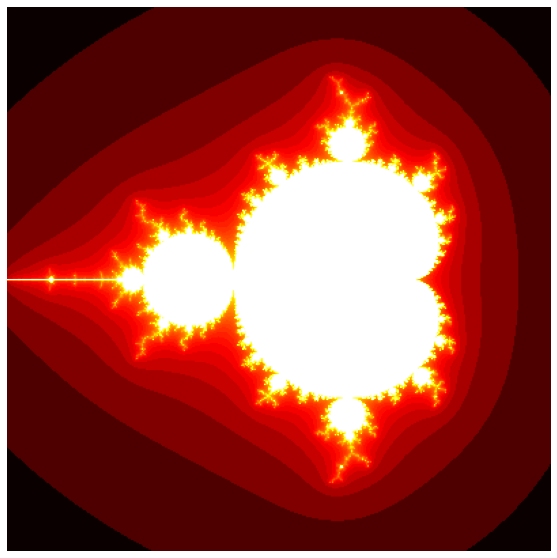

In [49]:
m = mandelbrot_python(size, iterations)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

4. Теперь мы оцениваем время, затраченное этой функцией:

In [50]:
%timeit mandelbrot_python(size, iterations)

4.82 s ± 93.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


5. Попробуем ускорить эту функцию с помощью Numba. Сначала мы импортируем пакет:

In [51]:
from numba import jit

6. Затем мы добавляем декоратор @jit прямо над определением функции, не меняя ни одной строки кода в теле функции:

In [52]:
@jit
def mandelbrot_numba(size, iterations):
    m = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            c = (-2 + 3. / size * j +
                 1j * (1.5 - 3. / size * i))
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z * z + c
                    m[i, j] = n
                else:
                    break
    return m

7. Эта функция работает так же, как и в чистой версии Python. Насколько быстрее это?

In [53]:
mandelbrot_numba(size, iterations)

array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

In [54]:
%timeit mandelbrot_numba(size, iterations)

34.7 ms ± 178 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Версия Numba примерно в 150 раз быстрее, чем версия Python!

В Python все блоки кода компилируются в байт-код:

In [55]:
import dis
dis.dis(mandelbrot_numba)

  3           0 LOAD_GLOBAL              0 (np)
              2 LOAD_METHOD              1 (zeros)
              4 LOAD_FAST                0 (size)
              6 LOAD_FAST                0 (size)
              8 BUILD_TUPLE              2
             10 CALL_METHOD              1
             12 STORE_FAST               2 (m)

  4          14 LOAD_GLOBAL              2 (range)
             16 LOAD_FAST                0 (size)
             18 CALL_FUNCTION            1
             20 GET_ITER
        >>   22 FOR_ITER               116 (to 140)
             24 STORE_FAST               3 (i)

  5          26 LOAD_GLOBAL              2 (range)
             28 LOAD_FAST                0 (size)
             30 CALL_FUNCTION            1
             32 GET_ITER
        >>   34 FOR_ITER               102 (to 138)
             36 STORE_FAST               4 (j)

  6          38 LOAD_CONST               1 (-2)
             40 LOAD_CONST               2 (3.0)
             42 LOAD_FAST       

### Как это работает?

Чтобы оптимизировать код Python, Numba берет байт-код из предоставленной функции и запускает на ней набор анализаторов. Байт-код Python содержит последовательность небольших и простых инструкций, поэтому можно восстановить логику функции из байт-кода без использования исходного кода из реализации Python. Процесс преобразования включает в себя много этапов, но в результате Numba переводит байт-код Python в промежуточное представление [LLVM](https://ru.wikipedia.org/wiki/LLVM) (IR).

Обратите внимание, что LLVM IR - это низкоуровневый язык программирования, который похож на синтаксис ассемблера и не имеет ничего общего с Python.

[Видео про LLVM IR для графики](https://www.youtube.com/watch?v=YWwNIbOaH8U)
[IR is better than assembly](https://idea.popcount.org/2013-07-24-ir-is-better-than-assembly/)
[Теория компиляции](https://ps-group.github.io/compilers/)
[Презентация Intel](https://academy.hpc-russia.ru/files/msu-llvm-lecture.pdf)

В Numba есть два режима: nopythonи object. Первый не использует среду выполнения Python и создает собственный код без зависимостей Python. Нативный код статически типизирован и работает очень быстро. Принимая во внимание, что объектный режим использует объекты Python и Python C API, что часто не дает значительных улучшений скорости. В обоих случаях код Python компилируется с использованием LLVM.

LLVM - это компилятор, который берет специальное промежуточное представление (IR) кода и компилирует его в собственный (машинный) код. Процесс компиляции включает в себя множество дополнительных проходов, в которых компилятор оптимизирует IR. LLVM toolchain очень хорош в оптимизации IR, поэтому он не только компилирует код для Numba, но и оптимизирует его.

Вся система выглядит примерно так ([подробнее](https://numba.pydata.org/numba-doc/dev/developer/architecture.html)):

<img width="300" alt="portfolio_view" src="https://raw.githubusercontent.com/dm-fedorov/pm3sem/master/pic/alg.jpg">


Обычно Numba дает наиболее впечатляющие ускорения для функций, которые включают в себя плотные циклы на массивах NumPy (например, в этом рецепте). Это связано с тем, что в Python есть служебные циклы, и эти издержки становятся пренебрежимо малыми, когда существует много итераций нескольких дешевых операций. В этом примере число итераций равно `size * size * iterations = 16 000 000`.

Давайте сравним производительность Numba с векторизованным вручную кодом, используя NumPy, который является стандартным способом ускорения чистого кода Python, такого как код, приведенный в этом рецепте. На практике это означает замену кода внутри двух циклов над `i` и `j` вычислениями массива. Здесь это относительно просто, поскольку операции строго следуют парадигме «Одна инструкция, несколько данных» (Single Instruction, Multiple Data - SIMD):

In [56]:
def initialize(size):
    x, y = np.meshgrid(np.linspace(-2, 1, size),
                       np.linspace(-1.5, 1.5, size))
    c = x + 1j * y
    z = c.copy()
    m = np.zeros((size, size))
    return c, z, m

In [57]:
def mandelbrot_numpy(c, z, m, iterations):
    for n in range(iterations):
        indices = np.abs(z) <= 10
        z[indices] = z[indices] ** 2 + c[indices]
        m[indices] = n

In [58]:
%%timeit -n1 -r10 c, z, m = initialize(size)
mandelbrot_numpy(c, z, m, iterations)

195 ms ± 6.11 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


В этом примере Numba по-прежнему превосходит NumPy.

Numba поддерживает множество других функций, таких как многопроцессорность и вычисления на GPU.

Введение: https://nyu-cds.github.io/python-numba/

Мануал: http://numba.pydata.org/numba-doc/latest/reference/index.html

[Использование Numba для ускорения](http://www.machinelearning.ru/wiki/images/0/0a/Numba_presentation.pdf)



### Cython

Cython - это и язык (надмножество Python), и библиотека Python. С помощью Cython мы начинаем с обычной программы на Python и добавляем аннотации о типе переменных. Затем **Cython переводит этот код в C и компилирует результат в модуль расширения Python**. Наконец, мы можем использовать этот скомпилированный модуль в любой программе на Python.

В то время как динамическая типизация требует затрат производительности в Python, статически типизированные переменные в Cython обычно приводят к более быстрому выполнению кода.

Повышение производительности является наиболее значительным в программах, связанных с процессором, особенно в тесных циклах Python. В отличие от этого, программы, связанные с вводом / выводом, вряд ли выиграют от реализации Cython.

Посмотрим, как ускорить пример кода Мандельброта с помощью Cython.

1. Давайте определим некоторые переменные:

In [61]:
import numpy as np

size = 400
iterations = 100

2. Чтобы использовать Cython в блокноте Jupyter, нам сначала нужно импортировать расширение Cython Jupyter:

In [63]:
%load_ext cython

3. В качестве первой попытки, давайте просто добавим `%%cython` перед определением функции `mandelbrot()`. Внутренне, эта магия компилирует ячейку в автономный модуль Cython, следовательно, необходимость выполнения всех необходимых импортов в одной и той же ячейке. Эта ячейка не имеет доступа к любой переменной или функции, определенной в интерактивном пространстве имен:

In [64]:
%%cython -a
import numpy as np

def mandelbrot_cython(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

Опция `-a` указывает Cython аннотировать строки кода цветом фона, указывая, насколько он оптимизирован. Чем темнее цвет, тем менее оптимизирована строка. Цвет зависит от относительного количества вызовов API Python в каждой строке. Мы можем нажать на любую строку, чтобы увидеть сгенерированный C-код. Здесь эта версия не выглядит оптимизированной.

4. Как быстро работает эта версия?

In [65]:
s = (size, size)

In [66]:
%%timeit -n1 -r1 m = np.zeros(s, dtype=np.int32)
mandelbrot_cython(m, size, iterations)

4.31 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


У нас здесь практически нет ускорения. Нам нужно указать тип наших переменных Python.

5. Давайте добавим информацию о типах, используя типизированные представления памяти для массивов NumPy (мы объясним это в разделе «Как это работает ...»). Мы также используем немного другой способ проверки того, что частицы покинули домен (если проверка):

In [ ]:
%%cython -a
import numpy as np

def mandelbrot_cython(int[:,::1] m,
                      int size,
                      int iterations):
    cdef int i, j, n
    cdef complex z, c
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if z.real**2 + z.imag**2 <= 100:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

5. Как быстро работает новая версия?

Эта версия почти в 350 раз быстрее первой!

Все, что мы сделали, - это указали тип локальных переменных и аргументов функций и обошли функцию NumPy `np.abs()` при вычислении абсолютного значения `z`. Эти изменения помогли Cython генерировать более оптимизированный код C из кода Python.

Ключевое слово `cdef` объявляет переменную как статически типизированную переменную C. Переменные C приводят к более быстрому выполнению кода, потому что накладные расходы от динамической типизации Python обойдены. Аргументы функции также могут быть объявлены как статически типизированные переменные Си.

Существует два способа объявления массивов NumPy как переменных C в Cython: использование буферов массива или использование типизированных представлений памяти. В этом рецепте мы использовали типизированные представления памяти. Мы рассмотрим буферы массивов в следующем рецепте.

Типизированные представления памяти обеспечивают эффективный доступ к буферам данных с NumPy-подобным синтаксическим индексированием. Например, мы можем использовать int [:, :: 1] для объявления C-упорядоченного 2D-массива NumPy с целочисленными значениями, где :: 1 означает непрерывный макет в этом измерении. Типизированные представления памяти могут быть проиндексированы так же, как массивы NumPy.

Однако представления памяти не реализуют поэлементные операции, такие как NumPy. Таким образом, представления памяти действуют как удобные контейнеры данных в тесных циклах. Для поэлементных операций, подобных NumPy, вместо этого следует использовать буферы массива.

Мы могли бы добиться значительного повышения производительности, заменив вызов `np.abs()` более быстрым выражением. Причина в том, что `np.abs()` является функцией NumPy с небольшими накладными расходами. Он предназначен для работы с относительно большими массивами, а не со скалярными значениями. Эти накладные расходы приводят к значительному снижению производительности в узком цикле, как здесь. Это узкое место можно обнаружить с помощью аннотаций Cython.

Учебник по Cython: http://docs.cython.org/en/latest/src/tutorial/cython_tutorial.html

Typed Memoryviews: https://cython.readthedocs.io/en/latest/src/userguide/memoryviews.html

Пример оптимизации на Cython: https://github.com/ipython-books/cookbook-2nd/blob/master/chapter05_hpc/06_ray.md

Про другие способы оптимизации: https://github.com/ipython-books/cookbook-2nd/tree/master/chapter05_hpc

Большой учебник по Cython: http://www.jyguagua.com/wp-content/uploads/2017/03/OReilly.Cython-A-Guide-for-Python-Programmers.pdf